# Problem Statement: House Price Prediction
- House prices depend on multiple factors such as location, size, number of rooms, and property features.
- Manually estimating house prices is difficult and often leads to inaccurate or inconsistent results.
- There is a need for an automated system that can analyze historical housing data to predict house prices accurately.
- This project aims to build a machine learning model to predict house prices based on important property features.
- The model learns patterns and relationships between features and house prices using past data.
- The predicted prices help buyers, sellers, and real estate agents make data-driven decisions.
- The system also identifies key features that significantly influence house prices.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("house_price_dataset.xlsx")

In [5]:
df.head()

,Area_sqft,Bedrooms,Bathrooms,Floors,ParkingSpaces,DistanceToCityCenter_km,CrimeRate,SchoolRating,Age_years,HousePrice
0,2098.028492,4,1,2,1,13.271291,1.731587,4,13,368048.006576
1,1717.041419,1,4,3,1,10.139559,2.650939,2,22,249184.292102
2,2188.613123,3,4,2,3,1.000000,4.009696,1,31,395773.591720
3,2713.817914,5,3,1,2,12.102465,3.163968,1,22,520326.450972
4,1659.507975,3,4,2,0,13.528072,6.556682,10,37,407037.036036


In [6]:
df.tail()

,Area_sqft,Bedrooms,Bathrooms,Floors,ParkingSpaces,DistanceToCityCenter_km,CrimeRate,SchoolRating,Age_years,HousePrice
995,1631.339824,1,3,3,3,10.371371,3.217867,9,1,439228.214145
996,2878.611916,4,4,1,1,17.846970,3.040410,6,49,580691.744293
997,2184.505717,6,1,3,2,11.037419,4.220655,1,32,447786.427118
998,1457.292606,5,1,1,1,13.992219,2.608009,6,9,373504.293563
999,2143.549669,1,3,2,0,14.186155,5.142199,6,29,379732.003238


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area_sqft                1000 non-null   float64
 1   Bedrooms                 1000 non-null   int64  
 2   Bathrooms                1000 non-null   int64  
 3   Floors                   1000 non-null   int64  
 4   ParkingSpaces            1000 non-null   int64  
 5   DistanceToCityCenter_km  1000 non-null   float64
 6   CrimeRate                1000 non-null   float64
 7   SchoolRating             1000 non-null   int64  
 8   Age_years                1000 non-null   int64  
 9   HousePrice               1000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 78.3 KB


In [8]:
df.describe()

,Area_sqft,Bedrooms,Bathrooms,Floors,ParkingSpaces,DistanceToCityCenter_km,CrimeRate,SchoolRating,Age_years,HousePrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1812.861869,3.556000,3.030000,1.981000,1.560000,11.820467,4.017609,5.567000,24.832000,392611.364662
std,584.123870,1.699339,1.424475,0.820556,1.116085,4.919948,1.458804,2.978991,14.127043,111575.850612
min,400.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,70508.326894
25%,1411.445817,2.000000,2.000000,1.000000,1.000000,8.193141,3.034654,3.000000,13.000000,318739.649529
50%,1815.180367,4.000000,3.000000,2.000000,2.000000,11.838749,3.966280,6.000000,25.000000,387384.988643
75%,2188.766325,5.000000,4.000000,3.000000,3.000000,15.491040,4.995190,8.000000,37.000000,462528.871349
max,4111.638894,6.000000,5.000000,3.000000,3.000000,26.603763,10.000000,10.000000,49.000000,823263.049026


In [9]:
df.isnull().sum()

Area_sqft                  0
Bedrooms                   0
Bathrooms                  0
Floors                     0
ParkingSpaces              0
DistanceToCityCenter_km    0
CrimeRate                  0
SchoolRating               0
Age_years                  0
HousePrice                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
num_df = df.select_dtypes(include=["int","float"])

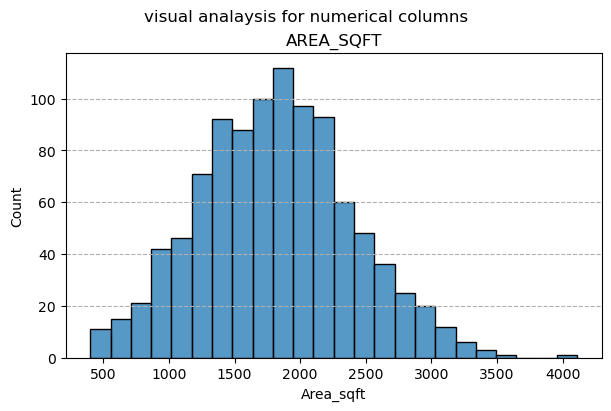

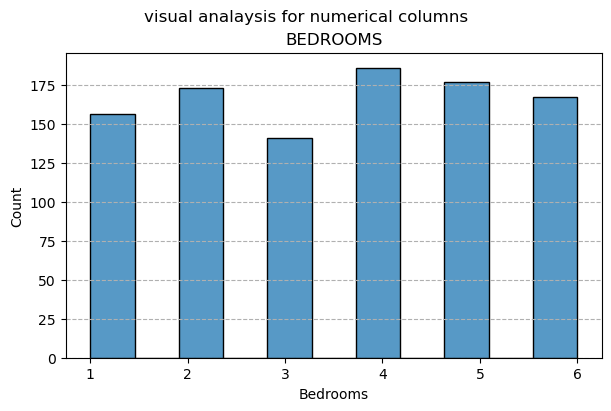

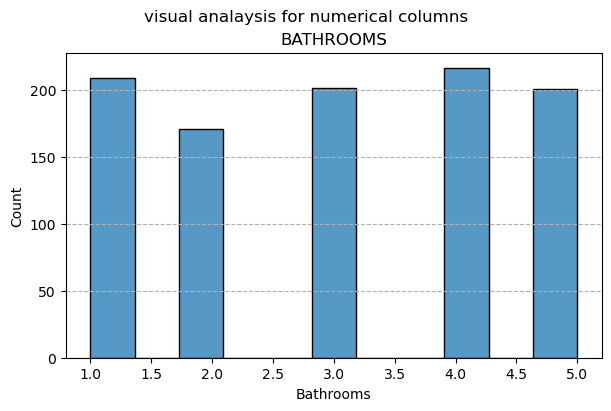

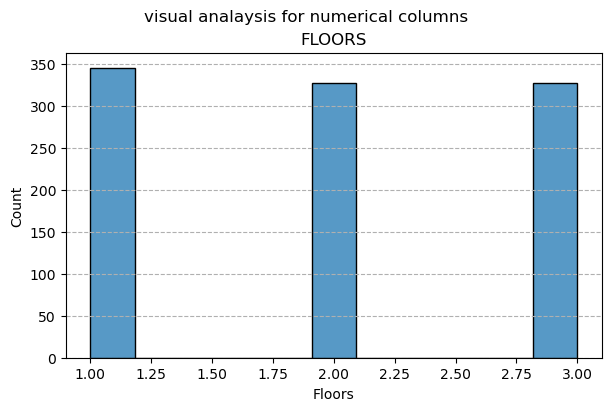

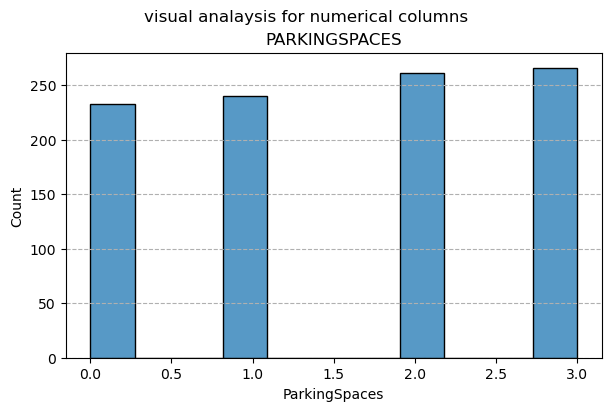

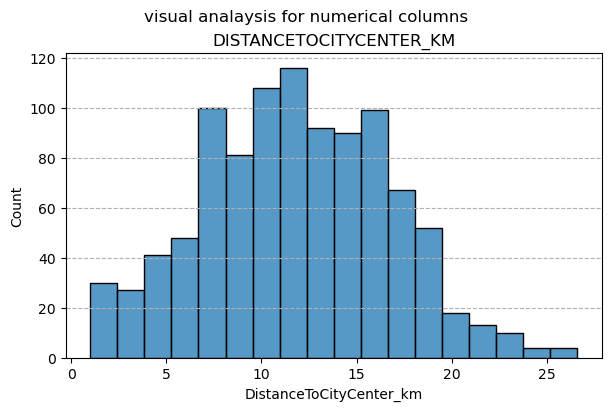

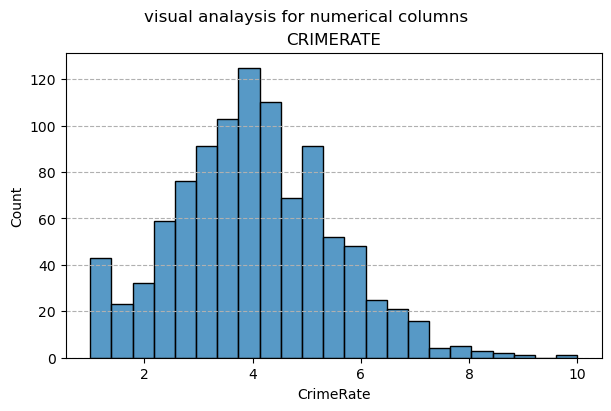

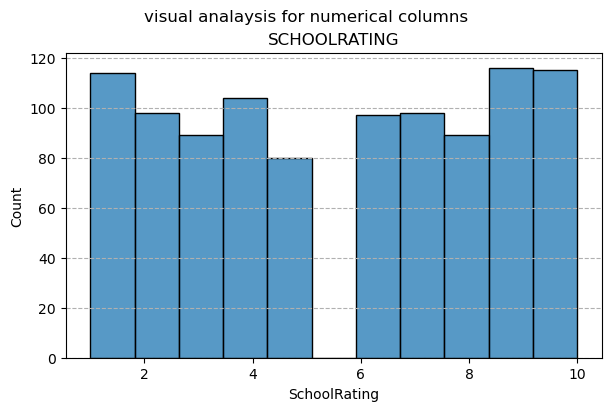

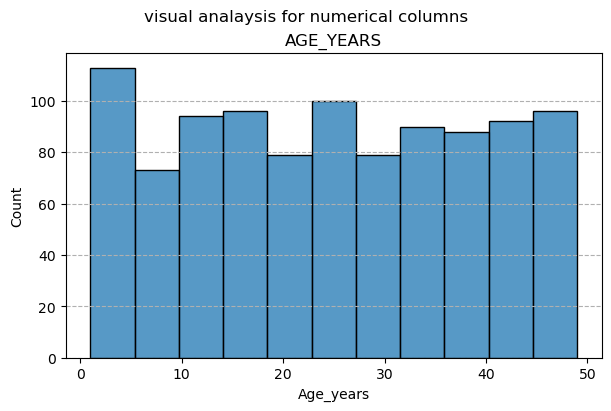

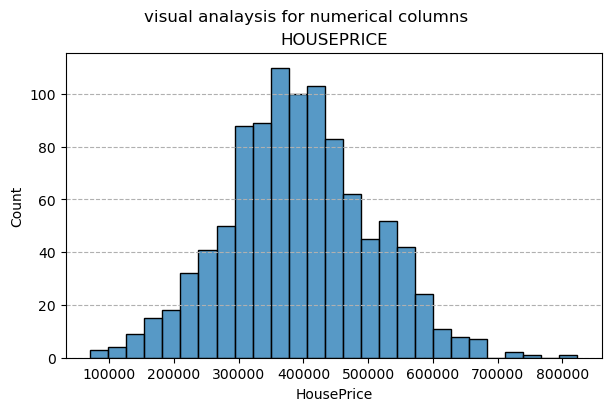

In [12]:
for col in num_df:
     fig,axs = plt.subplots(figsize=(6,4),constrained_layout=True)
     fig.suptitle("visual analaysis for numerical columns")
     axs.set_title(col.upper())
     sns.histplot(data=df,x=col,ax=axs)
     axs.grid(axis="y",linestyle="--",alpha=1)
     plt.show()

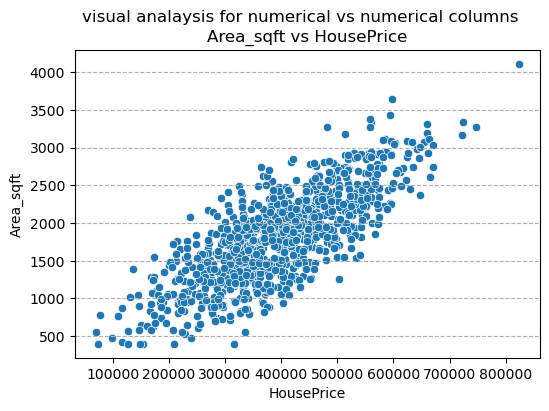

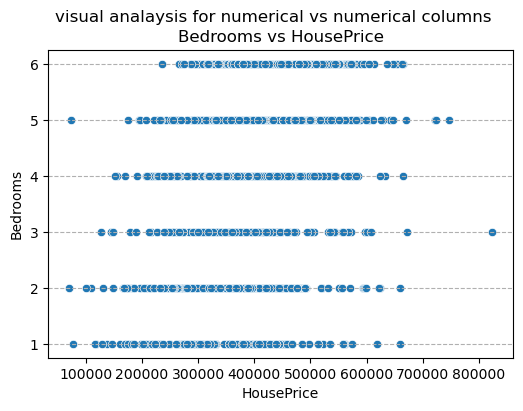

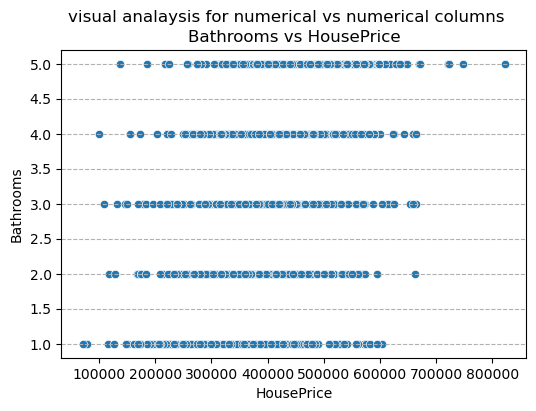

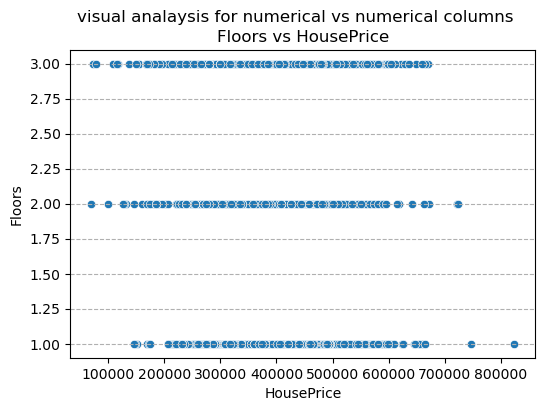

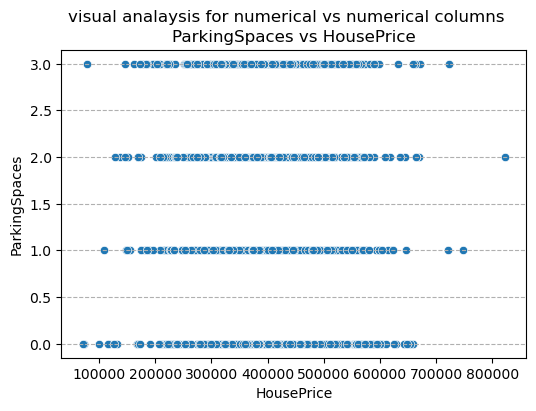

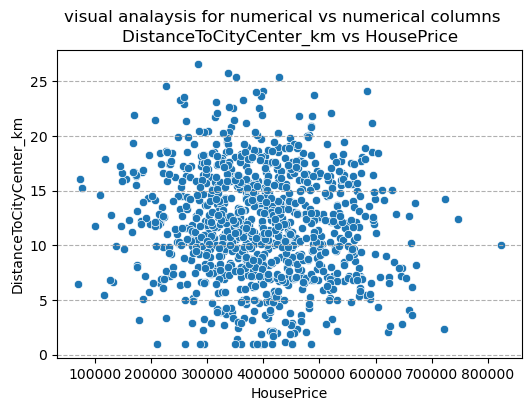

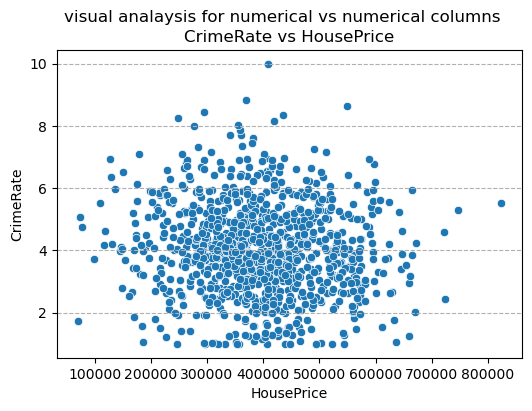

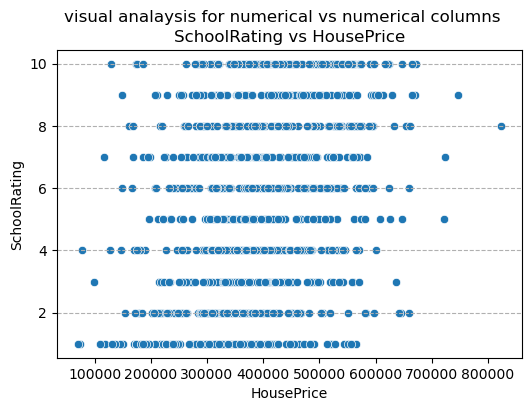

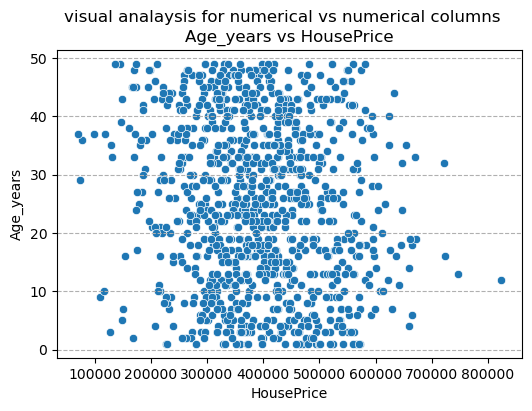

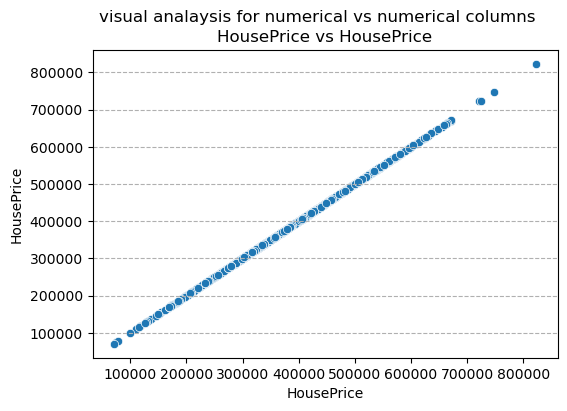

In [14]:
for col1 in num_df:
    fig,axs = plt.subplots(figsize=(6,4))
    fig.suptitle("visual analaysis for numerical vs numerical columns")
    axs.set_title(f"{col1} vs HousePrice")
    sns.scatterplot(data=df,x="HousePrice",y=col1,ax=axs)
    axs.grid(axis="y",linestyle="--",alpha=1)
    plt.show()
    

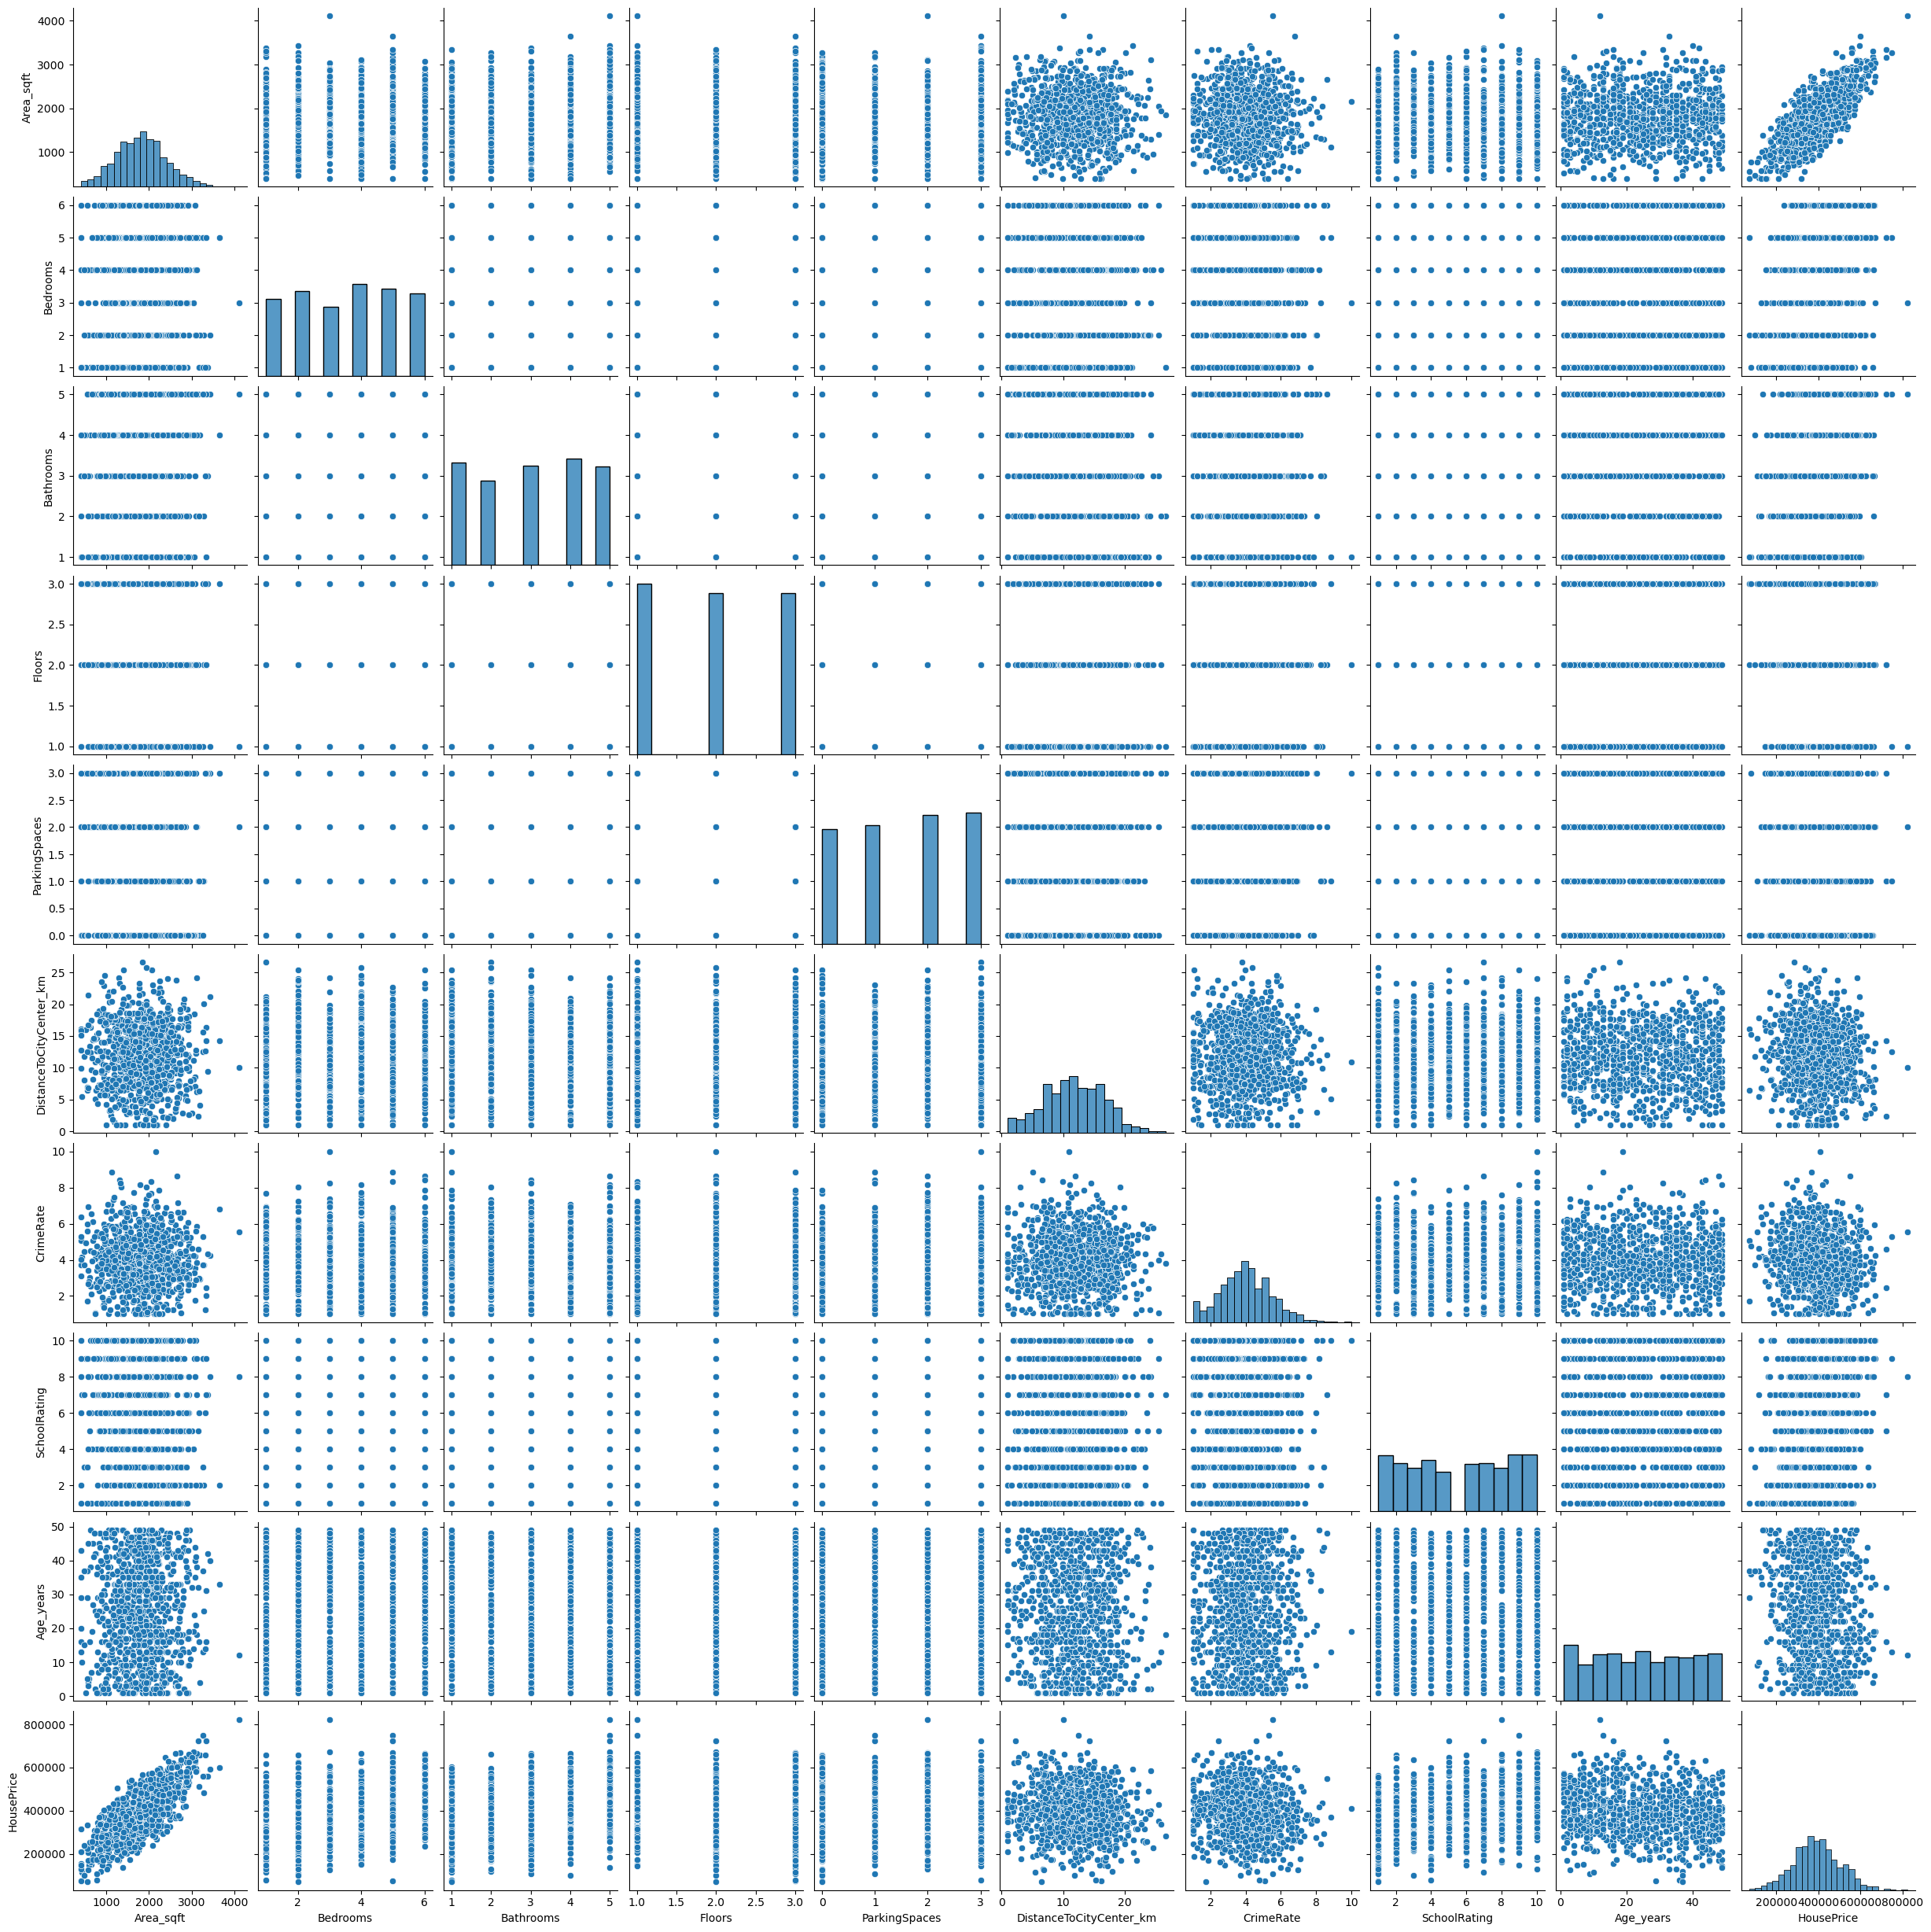

In [16]:
sns.pairplot(data=df)

<Axes: >

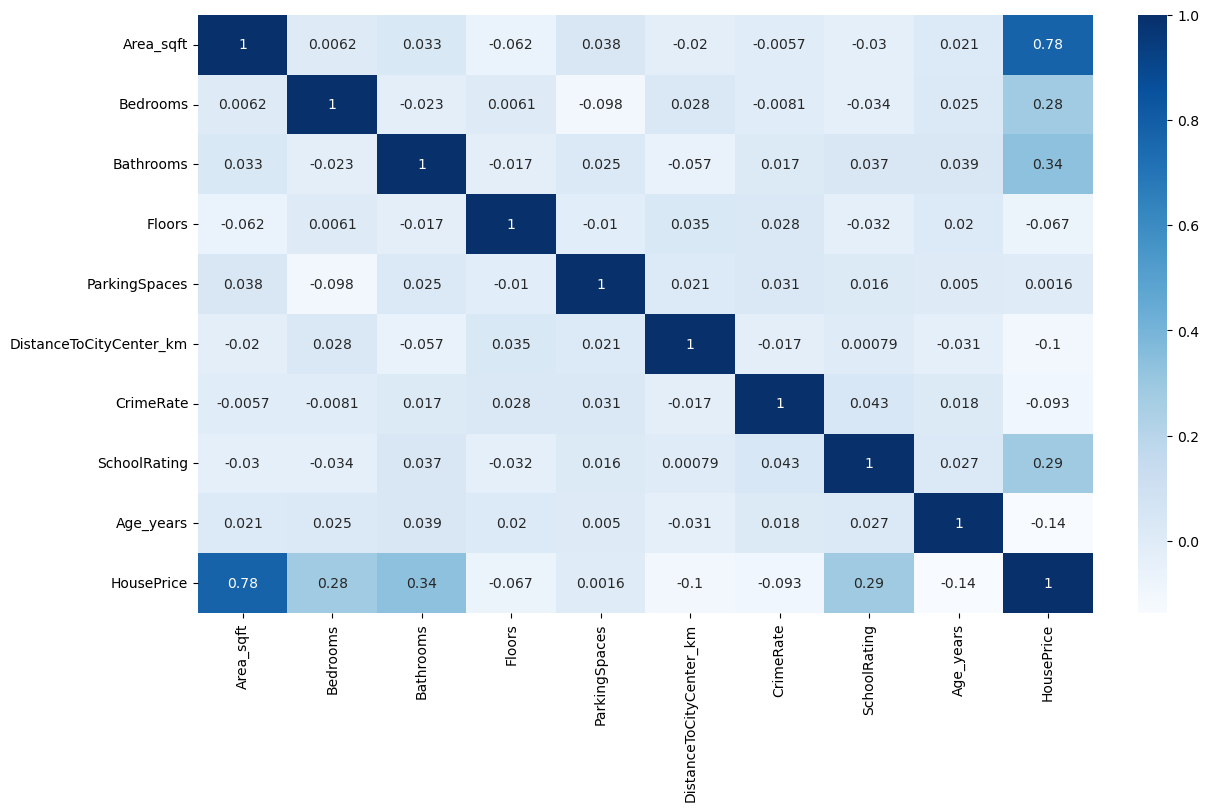

In [18]:
fig,axs = plt.subplots(figsize=(12,8),constrained_layout=True)
sns.heatmap(num_df.corr(),annot=True,cmap="Blues")

# Key Insights from Exploratory Data Analysis
1. **Area (sqft) vs House Price**
 
There is a strong positive correlation between area and house price.
As the area of the house increases, the price increases significantly.
Area is one of the most important predictors of house price.

2. **Bedrooms, Bathrooms, and Floors**

Houses with more bedrooms and bathrooms generally have higher prices.
These features show a step-wise pattern, indicating they are discrete variables.
Increase in bathrooms contributes more to price compared to bedrooms.

3. **Parking Spaces**

Houses with more parking spaces tend to have higher prices.
This feature has a moderate influence on house price.

4. **Distance to City Center**

House prices decrease as distance from the city center increases.
Properties closer to the city center are generally more expensive.
Indicates location plays a crucial role in pricing.

5. **Crime Rate**

Higher crime rates are associated with lower house prices.
This feature shows a negative relationship with price.

6. **School Rating**

Houses in areas with higher school ratings tend to have higher prices.
This feature positively impacts buyer preference and property value.

7. **Age of the House**

Older houses generally have lower prices compared to newer ones.
Newer properties are more valued due to better infrastructure and lower maintenance.

8. **Feature Distributions (Diagonal Plots)**

House prices and area show a right-skewed distribution.
Most houses fall into mid-range values, with fewer luxury properties.
Discrete variables (bedrooms, floors, parking) show clear categorical groupings.

9. **Multicollinearity Observation**

Bedrooms, bathrooms, and area are moderately correlated with each other.
Tree-based models can handle this well, while linear models may require checking multicollinearity.

10. **Overall Conclusion**
Area, number of bathrooms, distance to city center, and school rating are key drivers of house price.
The dataset shows both linear and non-linear relationships, making it suitable for models like:
Linear Regression
Decision Tree
Random Forest

# Why Linear Regression was Selected
 - House price is a continuous numerical variable, which makes Linear Regression suitable.
 - Many features (area, bedrooms, bathrooms) show a linear relationship with house price.
 - Linear Regression is simple, interpretable, and easy to explain.
 - It helps understand how each feature impacts price using coefficients.
 - Works well as a baseline model before trying complex algorithms.

In [20]:
X = df.drop(columns=["HousePrice"],axis=1)

y = df["HousePrice"]

In [22]:
X.head()

,Area_sqft,Bedrooms,Bathrooms,Floors,ParkingSpaces,DistanceToCityCenter_km,CrimeRate,SchoolRating,Age_years
0,2098.028492,4,1,2,1,13.271291,1.731587,4,13
1,1717.041419,1,4,3,1,10.139559,2.650939,2,22
2,2188.613123,3,4,2,3,1.000000,4.009696,1,31
3,2713.817914,5,3,1,2,12.102465,3.163968,1,22
4,1659.507975,3,4,2,0,13.528072,6.556682,10,37


In [24]:
y.head()

0    368048.006576
1    249184.292102
2    395773.591720
3    520326.450972
4    407037.036036
Name: HousePrice, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
X_train.shape

(750, 9)

In [30]:
X_test.shape

(250, 9)

In [32]:
y_train.shape

(750,)

In [34]:
y_test.shape

(250,)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)

In [38]:
X_test_transformed = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_transformed,y_train)

LinearRegression()

In [42]:
y_test_pred = reg.predict(X_test_transformed)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

print("r2_score",r2_score(y_test_pred,y_test))
print()
print(5*"-*"*5)
print()
print("mean_squared_error",mean_squared_error(y_test_pred,y_test))
print()
print(5*"-*"*5)
print()
print(" mean_absolute_percentage_error",mean_absolute_percentage_error(y_test_pred,y_test))
print()
print(5*"-*"*5)
print()
print("root_mean_squared_error",root_mean_squared_error(y_test_pred,y_test))


r2_score 0.9316349771156135

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

mean_squared_error 737349594.5257472

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

 mean_absolute_percentage_error 0.062189561825226336

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

root_mean_squared_error 27154.181897559483


# Evaluation Metrics & Interpretation
**1. R² Score**

Value: 0.93
Interpretation:
The model explains 93% of the variance in house prices.
Indicates a strong fit between features and target variable.

**2. Mean Squared Error (MSE)**

Value: 737,349,594.53
Interpretation:
Measures the average squared difference between actual and predicted prices.
Higher value due to squaring of large price differences.
Mainly used for optimization, not direct interpretation.

**3. Root Mean Squared Error (RMSE)**

Value: 27,154.18
Interpretation:
On average, the model’s predictions differ from actual house prices by ₹27,154.
Indicates good prediction accuracy for real estate pricing.

**Overall Model Performance**

The Linear Regression model performs very well on the dataset.
Strong R² and low error metrics indicate the model captures key pricing factors effectively.
The model is suitable for baseline and production-level comparison.
Conclusion
The Linear Regression model successfully predicts house prices with high accuracy and reliability. It provides interpretable results and serves as a strong baseline for further model improvements using advanced regression techniques.


In [47]:
import os
import joblib

# Make sure the folder exists
os.makedirs("reg", exist_ok=True)

# Save model in the 'model/' folder
joblib.dump(reg, "house_price_model.pkl")
print("✅ Model saved successfully in model/house_price_model.pkl")


✅ Model saved successfully in model/house_price_model.pkl
